# Лабораторная работа 1. Часть 1.
### ГЕНЕРАЦИЯ ЭКСПЕРИМЕНТАЛЬНЫХ ДАННЫХ

Наша модель:
$$ u = \theta _0 + \theta _1 x_1 + \theta _2 x_1^2 + \theta _3 x_2 + \theta _4 x_2^2 $$

Значения:
$$ \theta = (2, 2.5, 0.03, 0.1, -2) $$
$$ x_1 = {-1, -0.5, 0.5, 1} $$
$$ x_2 = {-1, -0.5, 0, 0.5, 1} $$

In [27]:
# импорт библиотек
import numpy as np
import pandas as pd
import scipy.stats
from matplotlib import pyplot as plt

In [28]:
# функция u
def u_func(x1, x2):
    return 2 + 2.5*x1 + 0.03*x1*x1 + 0.1*x2 - 2*x2*x2

In [29]:
# создаем массивы x1, x2 и u и заполняем их
x1 = np.array([-1, -0.5, 0.5, 1])
x2 = np.array([-1, -0.5, 0, 0.5, 1])
u = np.array([])

for i in x1:
    for j in x2:
        u = np.append(u, u_func(i, j))

u

array([-2.57  , -1.02  , -0.47  , -0.92  , -2.37  , -1.3425,  0.2075,
        0.7575,  0.3075, -1.1425,  1.1575,  2.7075,  3.2575,  2.8075,
        1.3575,  2.43  ,  3.98  ,  4.53  ,  4.08  ,  2.63  ])

In [30]:
# задаем параметры для дальнейших действий
n = len(u)
p = 0.1 # доля
u_average = np.full(n, np.mean(u))

# считаем ошибку наблюдения
w_sq = np.dot((u - u_average).transpose(), (u - u_average)) / (n - 1)
d = p * w_sq
e = np.random.normal(0, d, n)

e

array([ 0.18421278,  0.22497756,  0.47623376,  0.06659802, -0.19897178,
       -0.05292238,  0.37002819,  0.13396948,  0.3490041 , -0.76228739,
        0.0932773 , -0.04811609, -0.46075257, -0.21669394, -0.28868688,
        0.35356896,  0.9446016 ,  0.46065148,  0.22197664,  0.15930965])

In [31]:
# генерируем y по формуле y = u + e
y = u + e

y

array([-2.38578722, -0.79502244,  0.00623376, -0.85340198, -2.56897178,
       -1.39542238,  0.57752819,  0.89146948,  0.6565041 , -1.90478739,
        1.2507773 ,  2.65938391,  2.79674743,  2.59080606,  1.06881312,
        2.78356896,  4.9246016 ,  4.99065148,  4.30197664,  2.78930965])

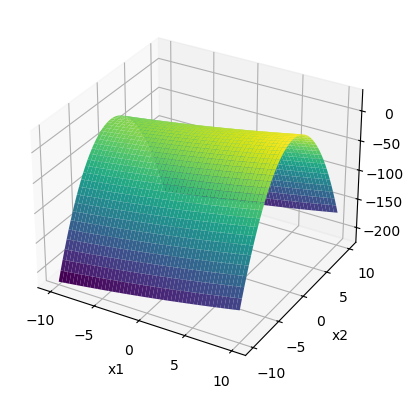

In [32]:
%matplotlib inline
# строим график зависимости незашумленного отклика от входных факторов
x1_points = np.linspace(-10, 10, 50)
x2_points = np.linspace(-10, 10, 50)
x1_grid, x2_grid = np.meshgrid(x1_points, x2_points)
u_grid = u_func(x1_grid, x2_grid)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(x1_grid, x2_grid, u_grid, cmap='viridis')

ax.set_xlabel('x1')
ax.set_ylabel('x2')

plt.show()

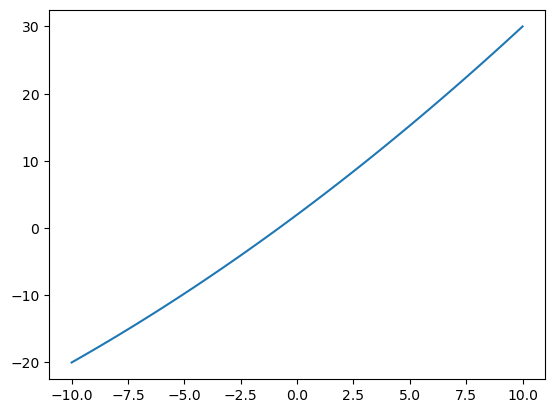

In [33]:
# построим еще пару простых графиков зависимости u от факторов
u_grid = u_func(x1_points, 0)
plt.plot(x1_points, u_grid)
plt.show()

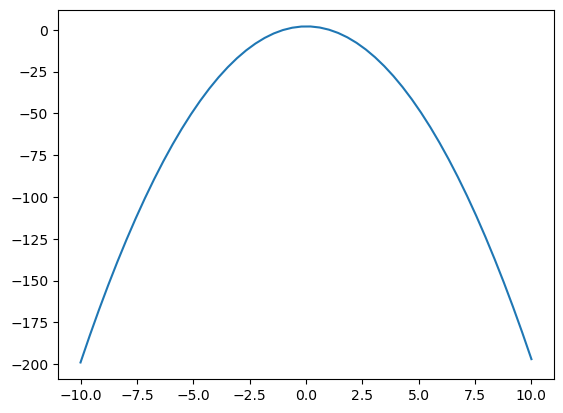

In [34]:
u_grid = u_func(0, x2_points)
plt.plot(x2_points, u_grid)
plt.show()

In [35]:
# создаем дф с данными и формируем файл
df = pd.DataFrame({'x1': np.repeat(x1, len(x2)), 
                   'x2': np.tile(x2, len(x1)),
                   'u': u,
                   'e': e,
                   'y': y})

df

,x1,x2,u,e,y
0,-1.0,-1.0,-2.5700,0.184213,-2.385787
1,-1.0,-0.5,-1.0200,0.224978,-0.795022
2,-1.0,0.0,-0.4700,0.476234,0.006234
3,-1.0,0.5,-0.9200,0.066598,-0.853402
4,-1.0,1.0,-2.3700,-0.198972,-2.568972
5,-0.5,-1.0,-1.3425,-0.052922,-1.395422
6,-0.5,-0.5,0.2075,0.370028,0.577528
7,-0.5,0.0,0.7575,0.133969,0.891469
8,-0.5,0.5,0.3075,0.349004,0.656504
9,-0.5,1.0,-1.1425,-0.762287,-1.904787


In [36]:
df.to_csv('lab_1_data.csv')

Дальше идёт реализация модели линейной регрессии вида:

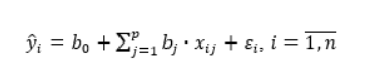

С помощью метода МНК. И вектор b(на картинке) и тета (в методе) будет иметь вид:


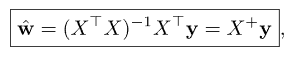

Напомню, что обратить $X^{\top}X$ и найти $X^{+}$ можно только если столбцы $X$ линейно независимы. Впрочем, если столбцы $X$ близки к линейной зависимости, вычисление $(X^{\top}X)^{-1}$ уже становится численно нестабильным. Степень линейной зависимости признаков в $X$ или, как говорят, мультиколлинеарности матрицы $X^{\top}X$, можно измерить числом обусловленности — отношением максимального собственного значения к минимальному. Чем оно больше, тем ближе $X^{\top}X$ к вырожденной и неустойчивее вычисление псевдообратной.

In [37]:
class MyLinearRegression:
    
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None
        self.k = None
        
        
    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)

        X = np.hstack((np.ones((X.shape[0], 1)), X))

        self.k = np.linalg.inv(X.T @ X) @ X.T @ y

        self.coef_ = self.k[::][1:]
        self.intercept_ = self.k[::][0]
        
    def predict(self, X):
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        y_pred = X @ self.k        
        return y_pred
    
    def get_param(self):
        return self.coef_, self.intercept_

In [38]:
LinModel = MyLinearRegression()

In [39]:
x = df[['x1','x2']]
x['x1^2'] = x['x1']**2
x['x2^2'] = x['x2']**2
y = df['y']

C:\Users\katya\AppData\Local\Temp\ipykernel_15000\854799105.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['x1^2'] = x['x1']**2
C:\Users\katya\AppData\Local\Temp\ipykernel_15000\854799105.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['x2^2'] = x['x2']**2


In [40]:
LinModel.fit(x,y)
y_predict = LinModel.predict(x)

In [41]:
LinModel.get_param()

(array([ 2.57261407, -0.12040763,  0.53351184, -2.29696999]),
 1.9342890165915396)

In [42]:
from sklearn.linear_model import LinearRegression
SKLinReg = LinearRegression()

In [43]:
SKLinReg.fit(x,y)

LinearRegression()

In [44]:
SKLinReg.coef_, SKLinReg.intercept_

(array([ 2.57261407, -0.12040763,  0.53351184, -2.29696999]),
 1.9342890165915394)

In [45]:
sigma = np.sqrt(p*w_sq)
e_predict = y - y_predict
sigma_sq_predict = e_predict.T @ e_predict / (n - 3)
F = sigma_sq_predict/sigma**2
FT = scipy.stats.f.ppf(q=1-0.05, dfn=9999, dfd=16)

In [46]:
print('F =', F)
print('FT =', FT)


F = 0.13309090785734248
FT = 2.0102414060038662


In [47]:
print('F < FT:', F < FT)

F < FT: True


Значит, модель линейной регресии НЕ признаётся неадекватной

In [48]:
myDF = x
myDF['y'] = y
myDF

,x1,x2,x1^2,x2^2,y
0,-1.0,-1.0,1.00,1.00,-2.385787
1,-1.0,-0.5,1.00,0.25,-0.795022
2,-1.0,0.0,1.00,0.00,0.006234
3,-1.0,0.5,1.00,0.25,-0.853402
4,-1.0,1.0,1.00,1.00,-2.568972
5,-0.5,-1.0,0.25,1.00,-1.395422
6,-0.5,-0.5,0.25,0.25,0.577528
7,-0.5,0.0,0.25,0.00,0.891469
8,-0.5,0.5,0.25,0.25,0.656504
9,-0.5,1.0,0.25,1.00,-1.904787


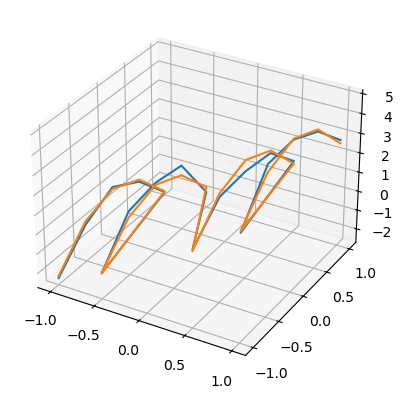

In [49]:

# importing libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
# defining surface and axes
x = myDF['x1']
y = myDF['x2']
z = myDF['y']
z1 = y_predict
 
fig = plt.figure()
 
# syntax for 3-D plotting
ax = plt.axes(projection='3d')
 
# syntax for plotting
ax.plot3D(x, y, z)
ax.plot3D(x, y, z1)
plt.show()

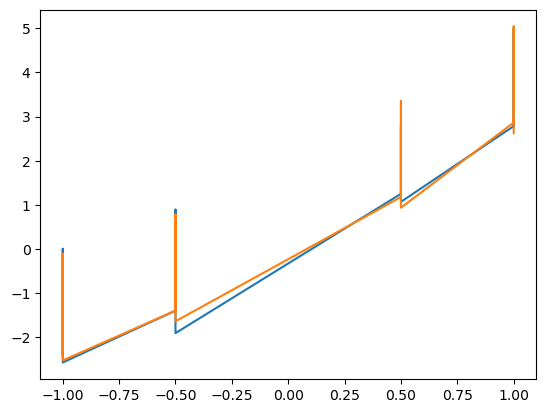

In [50]:
plt.plot(x, z)
plt.plot(x, y_predict)
plt.show()

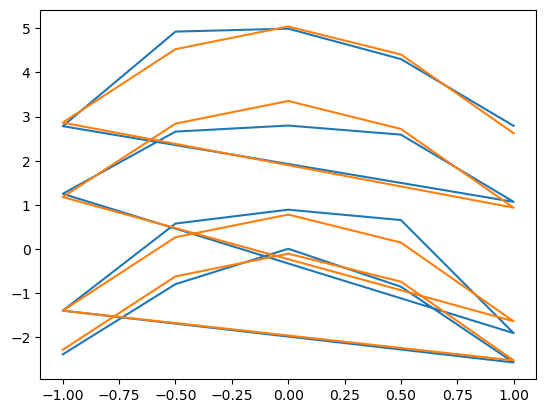

In [51]:
plt.plot(y, z)
plt.plot(y, y_predict)
plt.show()